In [223]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [224]:
df = pd.read_csv('data.csv')

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Url Car    268 non-null    object 
 1   Name       268 non-null    object 
 2   Price      268 non-null    float64
 3   Brand      268 non-null    object 
 4   Condition  268 non-null    object 
 5   Img        268 non-null    object 
 6   Img Url    268 non-null    object 
dtypes: float64(1), object(6)
memory usage: 14.8+ KB


In [226]:
df.columns

Index(['Url Car', 'Name', 'Price', 'Brand', 'Condition', 'Img', 'Img Url'], dtype='object')

In [227]:
df = df.drop(['Url Car','Img','Img Url'],1)

In [228]:
df.describe(include=['object'])

,Name,Brand,Condition
count,268,268,268
unique,247,23,3
top,Suzuki Wagon R Stingray 2018,Toyota,Used
freq,6,92,257


In [229]:
## Carro Suzuki Wagon aparece mais 
## Toyota a marca que mais aparece
## Condição usada é a que mais tem

In [230]:
df.describe()

,Price
count,268.000000
mean,59427.705205
std,71466.694949
min,2325.000000
25%,23750.000000
50%,38062.500000
75%,71243.750000
max,724500.000000


In [231]:
df

,Name,Price,Brand,Condition
0,Audi A4 2.0TDi 2014,72500.0,Audi,Used
1,Mercedes Benz E300 Night Edition 2015,107500.0,Mercedes Benz,Used
2,Mercedes Benz C200 headup display 2015,109000.0,Mercedes Benz,Used
3,Toyota Axio X Grade 2007,31125.0,Toyota,Used
4,Micro Panda 12000KMs 2015,12475.0,Micro,Used
...,...,...,...,...
263,Fiat Uno 1984,2750.0,Fiat,Used
264,Toyota Land Cruiser Prado 2003,59375.0,Toyota,Used
265,Mercedes Benz C180 Cabriolet 2017,140000.0,Mercedes Benz,Used
266,BMW X1 S Drive Diesel 2011,57250.0,BMW,Used


In [232]:
## Criar um modelo de clustering

In [233]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline

In [234]:
df_dummy=pd.get_dummies(df)

In [235]:
x = np.array(df_dummy)

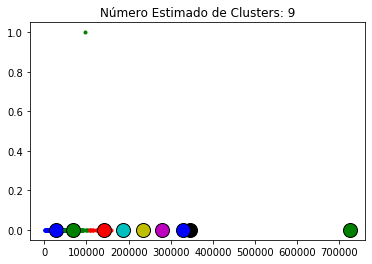

In [236]:
# bandwidth = Comprimento da Interação entre os exemplos, também conhecido como a largura de banda do algoritmo.
bandwidth = estimate_bandwidth(x, quantile = .1, n_samples = 500)
ms = MeanShift(bandwidth = bandwidth, bin_seeding = True)
ms.fit(x)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
 
n_clusters_ = labels.max()+1
 
#%% Plot 
plt.figure(1)
plt.clf()
 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(x[my_members, 0], x[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 14)
plt.title('Número Estimado de Clusters: %d' % n_clusters_)
plt.show()

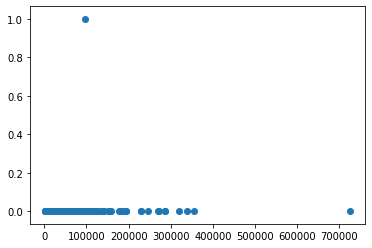

In [237]:
plt.scatter(x[:,0],x[:,1])
plt.show()

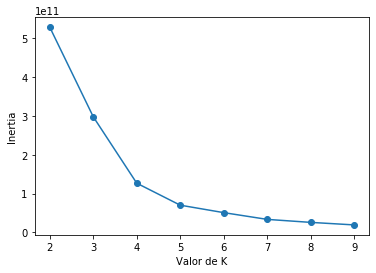

In [238]:
# Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo.
Ks = range(2, 10)
Ds = []
for K in Ks:
    cls = KMeans(n_clusters = K, random_state = 101)
    cls.fit(x)
    Ds.append(cls.inertia_)

plt.plot(Ks, Ds, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()

## Exemplo K-means

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

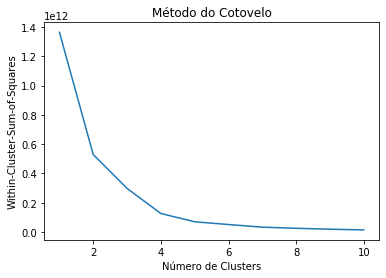

In [240]:
## Saber a quantidade certa de Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss) ## x vai de 1 até 10 e y o wcss
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.show()

In [241]:
## tomar cuidado para nao ficar muito proximo de 0
## vou de 5
## se eu quero K automatico eu uso o metodo MeanShift la de cima

## Usando K = 5

In [242]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init=10)
clusters = kmeans.fit_predict(x) ## retorna o predict e o
                                ## conjunto que cada amostra vai pertencer
clusters

array([4, 4, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2,
       4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 4, 4,
       4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 4, 2, 0, 0, 4, 0, 0, 4, 0, 0, 0,
       0, 2, 1, 4, 0, 2, 4, 0, 0, 0, 2, 0, 1, 1, 0, 4, 0, 0, 2, 4, 4, 1,
       2, 4, 0, 0, 0, 2, 4, 0, 0, 2, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4,
       4, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 1, 2, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4,
       0, 0, 0, 0, 4, 1, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 4, 4, 0, 0, 2, 4, 3, 0, 4, 4, 0, 0, 2, 0, 4, 0, 4, 0, 4, 0, 4,
       4, 0, 0, 4, 4, 2, 0, 0, 0, 1, 4, 1, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0,
       4, 2, 4, 0])

In [243]:
## temos os conjuntos 0,1,2,3,4.
## o primeiro carro pertence ao conjunto 2, o seghundo ao 2 e por ai vai

## Visualizando a clusterização nos dados

In [244]:
df['Clusters'] = clusters
df.head()

,Name,Price,Brand,Condition,Clusters
0,Audi A4 2.0TDi 2014,72500.0,Audi,Used,4
1,Mercedes Benz E300 Night Edition 2015,107500.0,Mercedes Benz,Used,4
2,Mercedes Benz C200 headup display 2015,109000.0,Mercedes Benz,Used,4
3,Toyota Axio X Grade 2007,31125.0,Toyota,Used,0
4,Micro Panda 12000KMs 2015,12475.0,Micro,Used,0


## Visualizando todos do conjunto 0,1,2,3,4

In [245]:
boolArray = df['Clusters'] == 0
df[boolArray]

,Name,Price,Brand,Condition,Clusters
3,Toyota Axio X Grade 2007,31125.0,Toyota,Used,0
4,Micro Panda 12000KMs 2015,12475.0,Micro,Used,0
5,Nissan Sunny FB15 SUPER SLOON 2001,20250.0,Nissan,Used,0
7,Honda Vezel Z Orange Gold 2015,45375.0,Honda,Used,0
8,Suzuki Wagon R Stingray Premium 2019,33200.0,Suzuki,Used,0
...,...,...,...,...,...
257,Honda Fit GP 4 RS Hybrid 2013,28400.0,Honda,Used,0
260,Micro Emgrand 2015,21325.0,Micro,Used,0
261,Toyota Prius S Grade 2009,30750.0,Toyota,Used,0
263,Fiat Uno 1984,2750.0,Fiat,Used,0


In [246]:
boolArray1 = df['Clusters'] == 1
df[boolArray1]

,Name,Price,Brand,Condition,Clusters
55,Toyota Land Cruiser Prado TXL 2020,287500.0,Toyota,New,1
90,Land Rover Range Autobiography SWB 2018,355000.0,Land Rover,Used,1
100,Land Rover Range Sport 2019,337500.0,Land Rover,Used,1
101,Toyota Land Cruiser Prado TX 2020,287500.0,Toyota,New,1
109,Toyota Land Cruiser Prado 2017,270500.0,Toyota,Used,1
186,Toyota Land Cruiser Prado TX LIMITED 2017,230000.0,Toyota,Reconditioned,1
203,Toyota Land Cruiser Prado 2015,229000.0,Toyota,Used,1
215,Toyota Land Cruiser Sahara V8 2017,320000.0,Toyota,Used,1
251,Toyota Land Cruiser Prado 2018,272500.0,Toyota,Used,1
253,Toyota Land Cruiser Sahara V8 DIESEL 2013,245000.0,Toyota,Reconditioned,1


In [247]:
boolArray2 = df['Clusters'] == 2
df[boolArray2]

,Name,Price,Brand,Condition,Clusters
17,Mercedes Benz C200 2018 AMG Primum plus,136500.0,Mercedes Benz,Used,2
19,Toyota 4Runner Hilux V Grade 2018,125000.0,Toyota,Used,2
26,Mercedes Benz E300 BLUETEC HYBRID 2015,122500.0,Mercedes Benz,Used,2
43,Land Rover Discovery 4 2015,176500.0,Land Rover,Used,2
78,Mercedes Benz C200 AMG Premium Plus 2019,149950.0,Mercedes Benz,Used,2
89,BMW X5 2015,155000.0,BMW,Used,2
93,Mercedes Benz CLA 200 White 2019,141500.0,Mercedes Benz,Used,2
98,BMW X5 2017,185000.0,BMW,Used,2
106,Toyota Land Cruiser Prado TXL 6FWD 2015,194750.0,Toyota,Used,2
110,Toyota Land Cruiser Prado TXL 6FWD 2015,194750.0,Toyota,Used,2


In [248]:
boolArray3 = df['Clusters'] == 3
df[boolArray3]

,Name,Price,Brand,Condition,Clusters
227,Toyota CHR 2018,724500.0,Toyota,Used,3


In [249]:
boolArray4 = df['Clusters'] == 4
df[boolArray4]

,Name,Price,Brand,Condition,Clusters
0,Audi A4 2.0TDi 2014,72500.0,Audi,Used,4
1,Mercedes Benz E300 Night Edition 2015,107500.0,Mercedes Benz,Used,4
2,Mercedes Benz C200 headup display 2015,109000.0,Mercedes Benz,Used,4
6,Toyota Premio 2015,64875.0,Toyota,Used,4
36,Toyota Hilux G 2018,90000.0,Toyota,Used,4
...,...,...,...,...,...
258,Toyota CHR BRUNO 2WD 2019,75000.0,Toyota,Reconditioned,4
259,Audi A4 2014,72500.0,Audi,Used,4
262,Nissan X-Trail Full options 2016,64000.0,Nissan,Used,4
264,Toyota Land Cruiser Prado 2003,59375.0,Toyota,Used,4


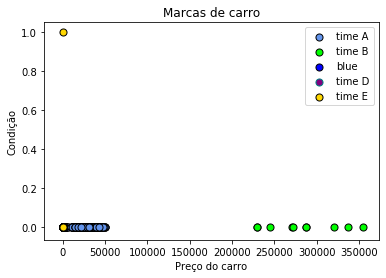

In [261]:
plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='cornflowerblue',
    edgecolor='black',
    label='time A'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='lime',
    edgecolor='black',
    label='time B'
)

plt.scatter(
    x[clusters == 2, 1], x[clusters == 2, 2],
    s=50, c='blue',
    edgecolor='black',
    label='blue'
)

plt.scatter(
    x[clusters == 3, 2], x[clusters == 3, 3],
    s=50, c='purple',
    edgecolor='teal',
    label='time D'
)

plt.scatter(
    x[clusters == 4, 3], x[clusters == 4, 4],
    s=50, c='gold',
    edgecolor='black',
    label='time E'
)

plt.title("Marcas de carro")
plt.xlabel("Preço do carro")
plt.ylabel("Condição")

plt.legend()
plt.show()

In [251]:
## 0 é usado
## 1 é novo
## recondictionade 0,1

## Plot com centroids

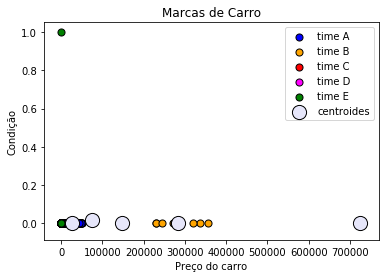

In [262]:
plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='blue',
    edgecolor='black',
    label='time A'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='time B'
)

plt.scatter(
    x[clusters == 2, 1], x[clusters == 2, 2],
    s=50, c='red',
    edgecolor='black',
    label='time C'
)

plt.scatter(
    x[clusters == 3, 2], x[clusters == 3, 3],
    s=50, c='fuchsia',
    edgecolor='black',
    label='time D'
)

plt.scatter(
    x[clusters == 4, 3], x[clusters == 4, 4],
    s=50, c='green',
    edgecolor='black',
    label='time E'
)
# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='lavender', edgecolor='black',
    label='centroides'
)
plt.title("Marcas de Carro")
plt.xlabel("Preço do carro")
plt.ylabel("Condição")

plt.legend()
plt.show()

In [256]:
df.to_csv('carros.csv', encoding='utf-8', index=False)